# 분류 모델 실습

[목표]
당뇨병을 분류하는 모델을 만드시오.

[컬럼 정보 해석]

- Preg (Number of pregnancies)
    - 임신 횟수. 여성이 임신을 몇 번 했는지를 나타냅니다. 임신 경험은 당뇨병 발병 위험과 관련이 있습니다.
- Plas (Plasma glucose concentration)
    - 경구 당부하 검사(OGTT)에서 2시간 뒤의 혈장 포도당 농도.
    - 혈당 수치가 높으면 당뇨 위험이 큽니다.
- Pres (Diastolic blood pressure, mm Hg)
    - 이완기 혈압(최소 혈압). 고혈압은 당뇨병과 밀접하게 관련된 위험 인자입니다.
- Skin (Triceps skin fold thickness, mm)
    - 상완 삼두근 부위의 피부 두께. 체지방률을 간접적으로 추정하기 위한 지표입니다.
- Test (2-Hour serum insulin, μU/ml)
    - 인슐린 농도 검사. 인슐린 수치 이상은 당뇨병 위험과 연결됩니다.
- Mass (Body mass index, BMI = weight in kg/(height in m)^2)
    - 체질량지수. 비만 여부를 나타내며, 비만은 당뇨 발병의 중요한 위험 요인입니다.
- Pedi (Diabetes pedigree function)
    - 가족력으로 인한 당뇨병 가능성을 수치화한 지표. 유전적 영향을 반영합니다. 값이 클수록 가족력에 따른 위험이 큼을 의미합니다.
- Age (years)
    - 나이. 나이가 많을수록 당뇨병 발병 위험이 커집니다.
- Class (Target: 1 = diabetic, 0 = not diabetic)
    - 목표 변수. 당뇨병 여부를 나타냅니다. 1은 당뇨병 환자, 0은 정상인.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('datas_ml/pima-indians-diabetes.csv')
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# [tip] 데이터 처리
- NaN은 없으나, 0이면 안되는 데이터가 있다고 하면, 최소값이 0으로 나온것 확인하고 처리하기
- 이런 경우가 발생한 이유 : 예전에는 데이터를 저장할 때 데이터분석, 인공지능을 위해 설계 하지 않았음.
- 서비스에서 사용자가 입력할때 입력안했을 때, 디폴트로 0으로 입력했을 경우

In [6]:
# 비어 있는 경우 null로 처리 또는 -1로 처리

In [7]:
df.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

- 0 인 값을 Nan으로 바꿔서 처리함.

In [8]:
import numpy as np

In [9]:
df.loc[:, 'Plas':'mass'].replace(0, np.nan)

,Plas,Pres,skin,test,mass
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


In [10]:
# df.loc[:, 'Plas':'mass'] = df.loc[:, 'Plas':'mass'].replace(0, np.nan)
cols = df.loc[:, 'Plas':'mass'].columns
df[cols] = df[cols].replace(0, np.nan)

In [11]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [12]:
df.isna().sum()

Preg       0
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df = df.reset_index(drop=True)
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    392 non-null    int64  
 1   Plas    392 non-null    float64
 2   Pres    392 non-null    float64
 3   skin    392 non-null    float64
 4   test    392 non-null    float64
 5   mass    392 non-null    float64
 6   pedi    392 non-null    float64
 7   age     392 non-null    int64  
 8   class   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 27.7 KB


In [16]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# X, y 구분

In [17]:
df.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [18]:
y = df['class']

In [21]:
X = df.drop('class', axis=1) # class 열을 제거해서 X용 입력 데이터만 남김

In [22]:
X.shape, y.shape

((392, 8), (392,))

- label, 2진분류 - one-hot-encoding은 할 필요 없음

# 피처스케일링
- 당뇨병인지 아닌지를 예측하는 것이 목표임.
- 학습 시킬 때, 어떻게 학습 시키는 것이 똘똘 할까?
- 정상 데이터는 엄청 많아, 비정상 데이터는 얼마 되지 않음.
- y 값이 편향 되어 있는게 없는지 확인할 것

In [24]:
y.value_counts()

class
0    262
1    130
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: xlabel='class', ylabel='count'>

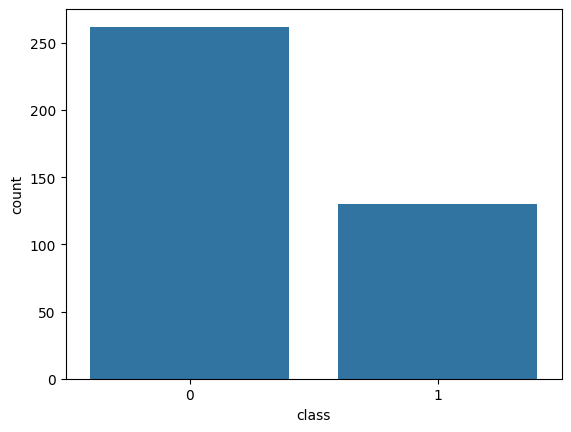

In [26]:
# y값의 비율 시각화
sb.countplot(data = df, x='class')

## [Tip] 데이터 불균형이 심할 경우 두가지 해결 방법
- 데이터를 버리고 하는 방법(sampling)
- 데이터를 늘리는 방법 (up sampling)
### up sampling

In [27]:
%pip install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]

Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
sm = SMOTE(random_state= 99 )

In [30]:
X.shape

(392, 8)

In [31]:
y.shape

(392,)

In [32]:
# 주족한 데이터는 up sampling 함
X, y = sm.fit_resample(X, y)

In [33]:
X.shape, y.shape

((524, 8), (524,))

In [34]:
y.value_counts()

class
0    262
1    262
Name: count, dtype: int64

- 정답은 없음, up sampling 을 할지, 안 할지는 분석가가 실험을 해봐야 함.
- 많이 해보고 잘되는 쪽으로 하는 것임.

# Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
X_scaler = StandardScaler()

In [38]:
X_scaled = X_scaler.fit_transform(X)

In [39]:
X_scaled

array([[-0.78239954, -1.25665137, -0.45820327, ..., -0.82256902,
        -1.12339601, -1.07958082],
       [-1.08451993,  0.25718318, -2.55790992, ...,  1.3995335 ,
         5.23265274,  0.07805973],
       [-0.17815878, -1.60357179, -1.75033044, ..., -0.39296253,
        -0.88066147, -0.59723059],
       ...,
       [ 1.03032276,  1.87689512, -0.19926717, ...,  0.59510897,
        -0.70407228,  1.04276019],
       [-0.78239954,  1.22029332,  0.15890199, ..., -1.43516324,
        -0.30741692,  0.07805973],
       [ 1.03032276,  0.47912171, -0.06265938, ...,  0.20129853,
        -0.61321706,  1.04276019]], shape=(524, 8))

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=99)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
classifier = LogisticRegression()

In [44]:
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [45]:
y_pred = classifier.predict(X_test)

In [46]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [48]:
cm = confusion_matrix(y_test, y_pred)

In [49]:
cm

array([[41, 10],
       [12, 42]])

In [50]:
# 잘 돌아가는 데이터와 잘 안돌아 가는 데이터

In [52]:
from sklearn.metrics import classification_report, accuracy_score


# y_test: 실제 라벨, y_pred: 모델 예측 라벨
print('정확도', accuracy_score(y_test, y_pred))
print('\n[정밀도, 재현율, F1-score 요약 보고서]')
print(classification_report(y_test, y_pred))

정확도 0.7904761904761904

[정밀도, 재현율, F1-score 요약 보고서]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        51
           1       0.81      0.78      0.79        54

    accuracy                           0.79       105
   macro avg       0.79      0.79      0.79       105
weighted avg       0.79      0.79      0.79       105



# 모델 일반화

In [53]:
df.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [80]:
new_data = {
    'Preg': 0,
    'Plas': 110,
    'Pres': 70,
    'skin': 20,
    'test': 80,
    'mass': 18,
    'pedi': 0.45,
    'age': 25
}
df_new_data = pd.DataFrame([new_data])
df_new_data

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,0,110,70,20,80,18,0.45,25


In [81]:
# 스케일러 적용 (학습했던 scaler 사용)
my_data_scaled = X_scaler.transform(df_new_data)

# 모델 저장하기
- 이유: 서빙한다. (서비스 만들기 위해)

In [62]:
import joblib
import os

In [77]:
os.makedirs('models', exist_ok=True)
# 모델 저장
joblib.dump(classifier, 'models/lrc_diabetes.pkl')

['models/lrc_diabetes.pkl']

In [78]:
# --- 2) 로딩 ---
ai = joblib.load('models/lrc_diabetes.pkl')

In [83]:
# --- 5) 예측 ---
y_pred = classifier.predict(my_data_scaled)
# y_prob = classifier.predict_proba(my_data_scaled)[:, 1]
y_pred

array([0])

In [84]:
print("예측 클래스:", y_pred[0])
print("1일 확률:", y_prob[0])

예측 클래스: 0
1일 확률: 0.10452078252393655
